# Import Modules

In [3]:
# data and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

# Prep Data

In [4]:
# import dataframes
filepath = '../data/data-case.xlsx'
df_users = pd.read_excel(filepath, sheet_name='users')
df_nps = pd.read_excel(filepath, sheet_name='nps')
df_appts = pd.read_excel(filepath, sheet_name='appointments')

# visualize datafram3es
df_users.head()
# df_nps.head()
# df_appts.head()

,user_id,gender,birth_date,start_date,end_date,city_code
0,1,female,1981-07-07,2010-06-29,2010-11-02,3
1,2,male,1996-10-08,2011-01-18,2012-02-18,1
2,3,female,1986-06-03,2010-01-13,2010-09-12,3
3,4,male,1992-07-28,2010-11-19,2012-08-01,3
4,5,male,1981-04-21,2011-08-27,2011-12-11,2


In [5]:
# compute number of days as a client, end date inclusive
df_users['num_days'] = df_users['end_date'] - df_users['start_date']
df_users['num_days'] = df_users['num_days'].dt.days
df_users.head()

,user_id,gender,birth_date,start_date,end_date,city_code,num_days
0,1,female,1981-07-07,2010-06-29,2010-11-02,3,126
1,2,male,1996-10-08,2011-01-18,2012-02-18,1,396
2,3,female,1986-06-03,2010-01-13,2010-09-12,3,242
3,4,male,1992-07-28,2010-11-19,2012-08-01,3,621
4,5,male,1981-04-21,2011-08-27,2011-12-11,2,106


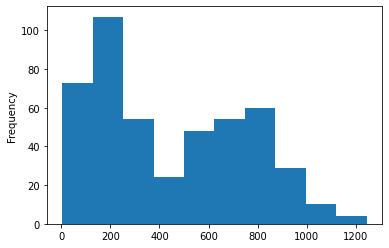

In [6]:
# Visualize distribution of days spent in the platform
plt.figure();
ax = df_users['num_days'].plot.hist()

# Group by gender

<Figure size 936x360 with 0 Axes>

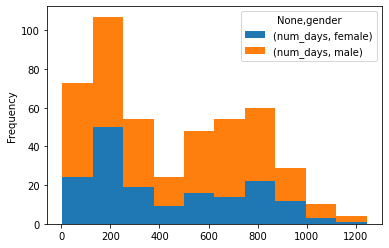

In [125]:
df = df_users.copy()
df[['num_days', 'gender']].pivot(columns='gender').plot(kind='hist', stacked=True)

# Group by city code

Text(0.5, 1.0, '')

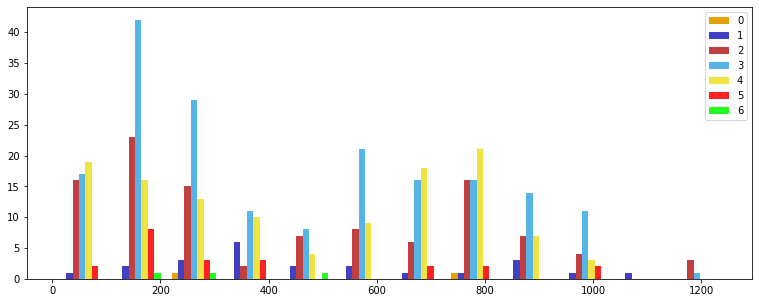

In [124]:
# Make a separate list for each 
x1 = list(df[df['city_code'] == 0]['num_days'])
x2 = list(df[df['city_code'] == 1]['num_days'])
x3 = list(df[df['city_code'] == 2]['num_days'])
x4 = list(df[df['city_code'] == 3]['num_days'])
x5 = list(df[df['city_code'] == 4]['num_days'])
x6 = list(df[df['city_code'] == 5]['num_days'])
x7 = list(df[df['city_code'] == 6]['num_days'])


# Assign colors for each airline and the names
colors = ['#E69F00','#4040C0','#C04040','#56B4E9','#F0E442','#FF2020','#20FF20']
names = ['0', '1', '2', '3', '4', '5', '6']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.figure(figsize=(13,5))
plt.hist([x1, x2, x3, x4, x5, x6, x7], bins = int(180/15), 
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('')
plt.ylabel('')
plt.title('')

# Group by last nps

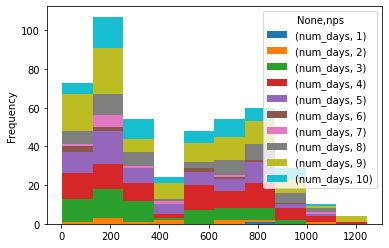

In [130]:
df['nps'] = df_nps['nps']
df[['num_days', 'nps']].pivot(columns='nps').plot(kind='hist', stacked=True)

# Group by appts

In [152]:
df = df_appts.copy()
df = df.groupby('user_id', as_index=False).count()
df = df.drop(columns=['appt_id', 'appointment_date', 'channel'])
df = df.rename(columns={"type": "num_appts"})
df.head()

,user_id,num_appts
0,1,2
1,2,7
2,3,4
3,4,8
4,5,1
...,...,...
458,459,5
459,460,8
460,461,4
461,462,11


In [157]:
df['num_days'] = df_users['num_days']
df.head()

,user_id,num_appts,num_days
0,1,2,126
1,2,7,396
2,3,4,242
3,4,8,621
4,5,1,106


# Type of first appt

In [158]:
df = df_appts.copy()
df = df[df['type'] == 'first']
df = df.reset_index()
df['num_days'] = df_users['num_days']
df

,index,appt_id,user_id,appointment_date,channel,type,num_days
0,0,1,1,2010-08-10,chat,first,126
1,2,3,2,2011-06-18,presential,first,396
2,9,10,3,2010-08-12,chat,first,242
3,13,14,4,2011-11-14,chat,first,621
4,21,22,5,2011-11-10,chat,first,106
...,...,...,...,...,...,...,...
458,2660,2661,459,2011-08-19,chat,first,354
459,2665,2666,460,2012-07-08,chat,first,630
460,2673,2674,461,2011-08-15,chat,first,225
461,2677,2678,462,2013-04-26,chat,first,897


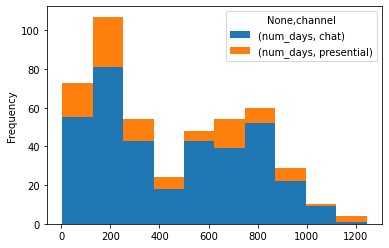

In [159]:
df[['num_days', 'channel']].pivot(columns='channel').plot(kind='hist', stacked=True)

In [160]:
from statsmodels.formula.api import ols

model = ols('num_days ~ C(channel)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4329
Date:                Mon, 06 Apr 2020   Prob (F-statistic):              0.511
Time:                        02:51:32   Log-Likelihood:                -3302.1
No. Observations:                 463   AIC:                             6608.
Df Residuals:                     461   BIC:                             6616.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  453.4959     15.926     28.476      0.000     422.200     484.792
C(channel)[T.presential]   -22.5459     34.268     -0.658      0.511     -89.887      44.795
==============================================================================
Omnibus:                      224.537   Durbin-Watson:                   3.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.266
Skew:                           0.350   Prob(JB):                     2.20e-08
Kurtosis:                       1.844   Cond. No.                         2.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Type of last appt

In [169]:
df = df_appts.copy()
df.drop_duplicates(subset = 'user_id', keep = 'last', inplace = True)
df = df.reset_index()
df['num_days'] = df_users['num_days']
df.head()

,index,appt_id,user_id,appointment_date,channel,type,num_days
0,1,2,1,2010-10-29,chat,regular,126
1,8,9,2,2011-07-06,presential,regular,396
2,12,13,3,2010-04-07,chat,regular,242
3,20,21,4,2011-11-17,presential,regular,621
4,21,22,5,2011-11-10,chat,first,106


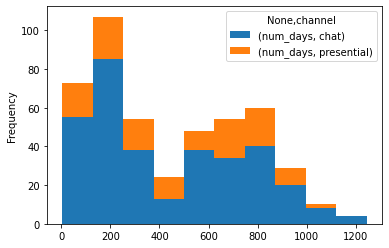

In [170]:
df[['num_days', 'channel']].pivot(columns='channel').plot(kind='hist', stacked=True)

In [171]:
from statsmodels.formula.api import ols

model = ols('num_days ~ C(channel)', data=df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               num_days   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.623
Date:                Mon, 06 Apr 2020   Prob (F-statistic):              0.203
Time:                        03:04:30   Log-Likelihood:                -3301.5
No. Observations:                 463   AIC:                             6607.
Df Residuals:                     461   BIC:                             6615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  437.5373     16.557     26.427      0.000     405.002     470.073
C(channel)[T.presential]    40.1111     31.489      1.274      0.203     -21.768     101.990
==============================================================================
Omnibus:                      202.851   Durbin-Watson:                   3.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.665
Skew:                           0.353   Prob(JB):                     2.97e-08
Kurtosis:                       1.861   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""